In [1]:
#构建数据集
import pandas as pd
  
df_trainset = pd.read_csv("/Users/vegeta/Downloads/fashion-mnist_train.csv")
df_textset = pd.read_csv("/Users/vegeta/JupterLab/data_set/fashion-mnist_test.csv")
df_trainset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class FasionMNIST(Dataset):
	"""构建FashionMINIST图像数据集"""
	def __init__(self, df_dataset):
		self.y = df_dataset.label.values
		self.x = df_dataset.iloc[:, 1:].values

	def __len__(self):
		return len(self.y)

	def __getitem__(self, idx):
		y = torch.LongTensor([self.y[idx]])
		x = torch.Tensor(self.x[idx])
		return y,x

In [3]:
train_dataset = FasionMNIST(df_trainset)
test_dataset = FasionMNIST(df_textset)

len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1024)

len(train_dataloader), len(test_dataloader)

(59, 10)

In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [6]:
#构建lenet模型
lenet = nn.Sequential(nn.Conv2d(1, 6, kernel_size = 5, padding = 2),
                      nn.Sigmoid(),
                      nn.AvgPool2d(kernel_size = 2, stride = 2),
                      
                      nn.Conv2d(6, 16, kernel_size = 5),
                      nn.Sigmoid(),
                      nn.AvgPool2d(kernel_size = 2, stride = 2),
                      
                      nn.Flatten(),
                      nn.Linear(16*5*5, 120),
                      nn.Sigmoid(),
                      
                      nn.Linear(120, 84),
                      nn.Sigmoid(),
                      
                      nn.Linear(84, 10))

lenet.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 1e-4)

In [7]:
#定义训练模型
def train_model(model, train_dataloader, loss_func, optimizer):
    total_loss = 0

    model.train()
    for y,x in train_dataloader:
        y_hat = model(x.view(x.shape[0], 1, 28, 28).to(device)
        loss = loss_func(y_hat, y.to(device).view(y.shape[0]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Total loss: {total_loss/len(train_dataloader): 0.4f}")
    model.eval()
    return total_loss/len(train_dataloader)

In [8]:
#定义测试模型
def test_model(model, test_dataloader, loss_func):
    test_loss = 0

    model.eval()
    for y,x in test_dataloader:
        y_hat = model(x.view(x.shape[0], 1, 28, 28).to(device)
        loss = loss_func(y_hat, y.to(device).view(y.shape[0]))

        test_loss += loss.item()

    print(f"Test loss: {test_loss/len(test_dataloader): 0.4f}")
    model.train()
    return test_loss/len(test_dataloader)

In [9]:
#训练模型
epoch = 200
train_loss_records = []
test_loss_records = []

for i in range(epoch):
    train_loss = train_model(lenet, train_dataloader, loss_func, optimizer)
    test_loss = test_model(lenet, test_dataloader, loss_func)
	
    train_loss_records.append(train_loss)
    test_loss_records.append(test_loss)

Total loss:  2.3180
Test loss:  2.3021
Total loss:  2.3005
Test loss:  2.2988
Total loss:  2.2963
Test loss:  2.2921
Total loss:  2.2843
Test loss:  2.2721
Total loss:  2.2463
Test loss:  2.2067
Total loss:  2.1366
Test loss:  2.0470
Total loss:  1.9514
Test loss:  1.8584
Total loss:  1.7900
Test loss:  1.7271
Total loss:  1.6774
Test loss:  1.6274
Total loss:  1.5827
Test loss:  1.5364
Total loss:  1.4963
Test loss:  1.4552
Total loss:  1.4211
Test loss:  1.3866
Total loss:  1.3579
Test loss:  1.3294
Total loss:  1.3050
Test loss:  1.2810
Total loss:  1.2596
Test loss:  1.2398
Total loss:  1.2202
Test loss:  1.2035
Total loss:  1.1861
Test loss:  1.1716
Total loss:  1.1556
Test loss:  1.1439
Total loss:  1.1284
Test loss:  1.1181
Total loss:  1.1041
Test loss:  1.0951
Total loss:  1.0818
Test loss:  1.0739
Total loss:  1.0609
Test loss:  1.0542
Total loss:  1.0412
Test loss:  1.0353
Total loss:  1.0228
Test loss:  1.0173
Total loss:  1.0047
Test loss:  0.9992
Total loss:  0.9868
Test 

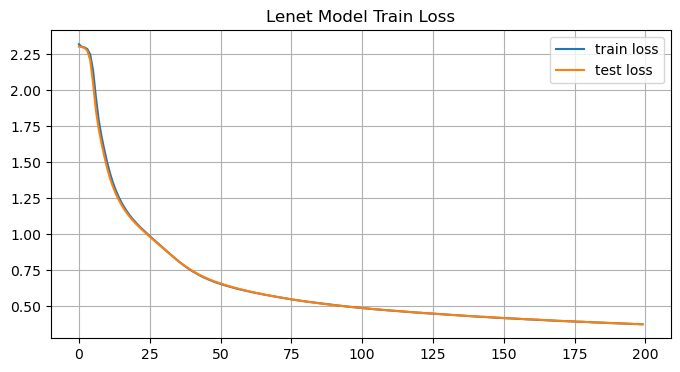

In [10]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

plt.figure(figsize=(8, 4))
plt.plot(train_loss_records, label="train loss")
plt.plot(test_loss_records, label="test loss")
plt.title("Lenet Model Train Loss")
plt.legend()

plt.grid()
plt.show()